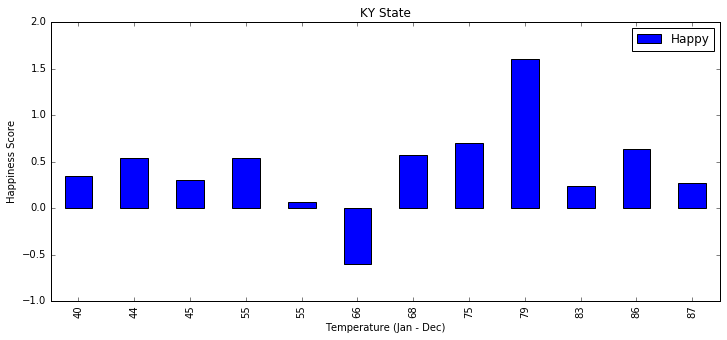

In [159]:
import pandas as pd
df = pd.read_csv('KYh.csv')
df = df.sort_values(['Temp'])
ax = df.plot(x='Temp', y='Happy', kind='bar', title='KY State')
ax.set_ylabel("Happiness Score")
ax.set_xlabel("Temperature (Jan - Dec)")
#ax.show()

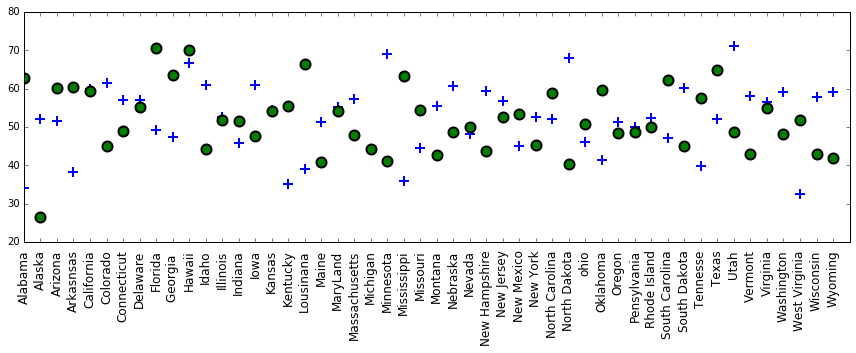

In [179]:
import pandas as pd
import itertools
df = pd.read_csv('all_states.csv')
df = df.sort_values(['Temp'])
plt.rcParams['xtick.major.pad'] = 8
#plotting style(s)
marker = itertools.cycle(('+', 'o', '.', 'o', '*'))
color = itertools.cycle(('b', 'g', 'r', 'c', 'm', 'y', 'k'))
#plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df.index, df['Happiness'], ls='', ms=10, mew=2,
        marker=marker.next(), color=color.next())
ax.plot(df.index, df['Temp'], ls='', ms=10, mew=2,
        marker=marker.next(), color=color.next())

# set the tick labels
ax.xaxis.set_ticks(df.index)
ax.xaxis.set_ticklabels(df['States'])
plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=12)
plt.tight_layout()

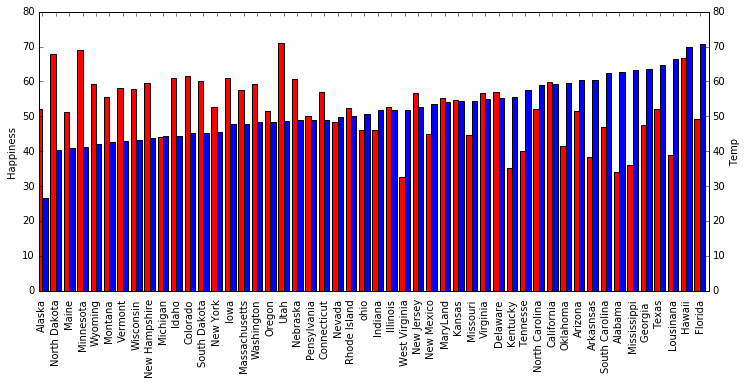

In [194]:
df = pd.read_csv('all_states.csv')
df = df.sort_values(['Temp']).reset_index(drop='True')
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.Happiness.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df.Temp.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Happiness')
ax2.set_ylabel('Temp')

ax.xaxis.set_ticks(df.index)
ax.xaxis.set_ticklabels(df['States'])

plt.show()

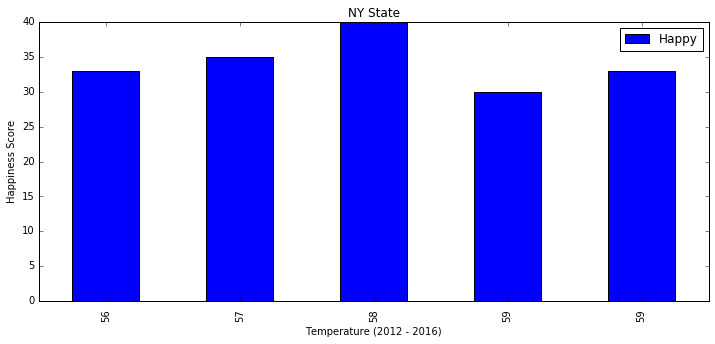

In [208]:
import pandas as pd
df = pd.read_csv('NYw.csv')
df = df.sort_values(['Temp'])
ax = df.plot(x='Temp', y='Happy', kind='bar', title='NY State')
ax.set_ylabel("Happiness Score")
ax.set_xlabel("Temperature (2012 - 2016)")
#ax.show()

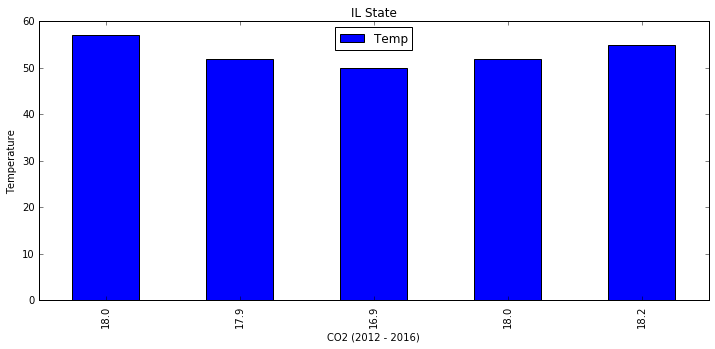

In [149]:
import pandas as pd
df = pd.read_csv('ILC.csv')
ax = df.plot(x='CO2', y='Temp', kind='bar', title='IL State')
ax.set_ylabel("Temperature")
ax.set_xlabel("CO2 (2012 - 2016)")
#ax.show()

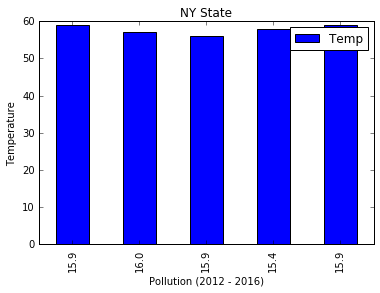

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('nyp.csv')
ax = df.plot(x='pollution', y='Temp', kind='bar', title='NY State')
ax.set_ylabel("Temperature")
ax.set_xlabel("Pollution (2012 - 2016)")
#ax.show()

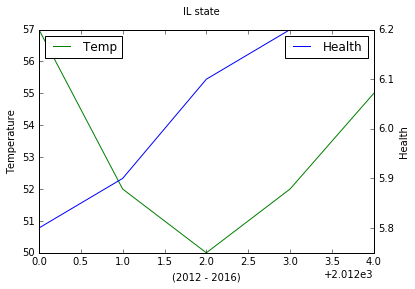

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('ilht.csv')
fig, ax1 = plt.subplots()

fig.suptitle('IL state')

x = df['Year']
y1 = df['Temp']
y2 = df['Health']

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-', label='Temp')
ax2.plot(x, y2, 'b-', label='Health')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_ylabel("Temperature")
ax2.set_ylabel("Health")
ax1.set_xlabel("(2012 - 2016)")

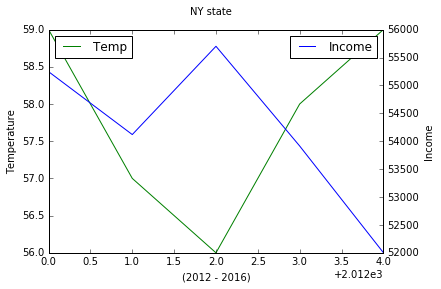

In [37]:
df = pd.read_csv('nyi.csv')
fig, ax1 = plt.subplots()

fig.suptitle('NY state')

x = df['Year']
y1 = df['Temp']
y2 = df['Income']

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-', label='Temp')
ax2.plot(x, y2, 'b-', label='Income')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_ylabel("Temperature")
ax2.set_ylabel("Income")
ax1.set_xlabel("(2012 - 2016)")

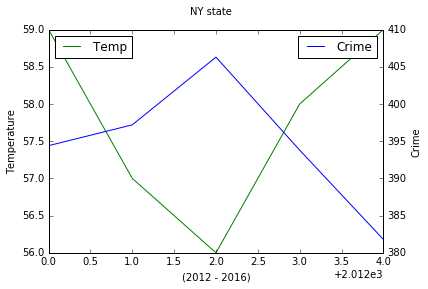

In [58]:
df = pd.read_csv('nycr.csv')
fig, ax1 = plt.subplots()

fig.suptitle('NY state')

x = df['Year']
y1 = df['Temp']
y2 = df['Crime']

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-', label='Temp')
ax2.plot(x, y2, 'b-', label='Crime')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_ylabel("Temperature")
ax2.set_ylabel("Crime")
ax1.set_xlabel("(2012 - 2016)")

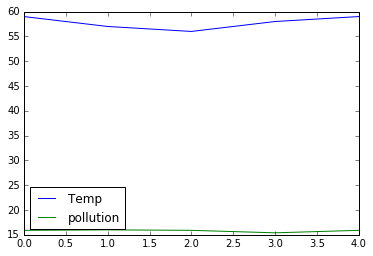

In [19]:
df[['Temp','pollution']].plot()

In [1]:
import sys
import ConfigParser
import io
import ast
import json
from sklearn.cross_validation import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifierCV
from scipy.stats.stats import pearsonr
import re
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(12.0,5.0)
from IPython.display import Markdown, display
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.metrics import mean_squared_error
import math

def printmd(string):
    display(Markdown(string))

def location_storage(filename):
    tweets = [];
    location_file="data_run" + os.sep+filename;
    #location_file=filename;
    location_dict={};
    location_full_form={};
    with open(location_file) as f:
        for line in f:
            line=line.strip();
            line=line.replace(' ', '');
            location_list=[line.split(':')]
            location_dict[location_list[0][0]]=location_list[0][1];
            location_full_form[location_list[0][0]]=location_list[0][2];
    return location_dict,location_full_form ;

def y_matrix(filename):
    y_file=filename;
    y_dict={};
    y_list=[]
    with open(y_file) as f:
        for line in f:
            line=line.strip();
            line=line.replace(' ', '');
            y_list=[line.split(':')]
            y_dict[y_list[0][0]]=y_list[0][1];
    return y_dict ;

def get_tweets_dict(location_dict):
    tweets_text=[]
    tweets_place = {};
    tweet_text_list=[];
    tweet_text_string=''
    y_wellbeing=[]
    
    count_state_tweets=0;
    
    for i in sorted(location_dict):
        fname="data_run" + os.sep+"tweet_state_data_"+i+".json"
        files =  open(fname);
        lists=[x.strip() for x in files.readlines()]
        string_file=str(lists)
        tweet_data=string_file.split("||;");
        tweet_data=tweet_data[0:len(tweet_data)-1]
        for td in tweet_data:
            #tweet_text_list.append(td.split("||~")[0]);
            tweet_place_string=td.split("||~")[1];
            tweet_place_str=tweet_place_string.split("==>")[1]
            if re.findall(i, tweet_place_str) or re.findall(location_full_form[i],tweet_place_str , re.I):
                tweet_text_str=td.split("||~")[0];
                tweet_text_list.append(tweet_text_str.split("==>")[1])
        #for listlen in range(len(tweet_text_list)):
        for listlen in set(tweet_text_list):
            tweet_text_string=listlen+" "+tweet_text_string
        count_state_tweets=len(set(tweet_text_list));
        print "%d no. of tweets in state: %s" % (count_state_tweets, i);
        tweets_text.append(tweet_text_string);
        y_wellbeing.append(1. * float(y_dict_wellbeing[i]))
        count_state_tweets=0;
        tweet_text_list=[]
        tweet_text_string='';
    return tweets_text,np.array(y_wellbeing, dtype=float)
        
def tokenize(string, lowercase=True, keep_punctuation=False,
             collapse_urls=True, collapse_mentions=True, collapse_emoji=True):
    """ Split a tweet into tokens."""
    if not string:
        return []
    string = re.sub(r'\W*\b\w{1,2}\b', '', string)
    string = re.sub('lmao\S+', '', string)
    string = re.sub('yess\S+', '', string)
    string = re.sub(r'\w*\d\w*', '', string)
    string = re.sub(r'\w*thanksgiving\w*', '', string)
    string = re.sub('ahh\S+', '', string)
    string = re.sub(r'yooo\S+', '', string)
    string = re.sub(r'sooo\S+', '', string)
    string = re.sub(r'buttt\S+', '', string)
    string = re.sub(r'ohhhh\S+', '', string)
    string = re.sub(r'goooo\S+', '', string)
    string = re.sub(r'bihhh\S+', '', string)
    
    string = re.sub(r'lmfao\S+', '', string)
    
    if lowercase:
        string = string.lower()
    tokens = []
    if collapse_urls:
        string = re.sub('http\S+', 'THIS_IS_A_URL', string)
    if collapse_mentions:
        string = re.sub('@\S+', 'THIS_IS_A_MENTION', string)
    if collapse_emoji:
        string = re.sub(r'\\x[0123456789abcdef]+', '', string)
    if keep_punctuation:
        tokens = string.split()
    else:
        tokens = re.sub('\W+', ' ', string).split()
    return tokens

def plot_trends(x, y1, y2, label1, label2):
    # Plot two trends with different y-scales
    fig, ax1 = plt.subplots()
    l1=ax1.plot(y1, 'b.-', label=label1)
    ax1.set_ylabel(label1, color='b')
    plt.xticks(range(len(x))[::1], x[::1], rotation='90')
    ax2 = ax1.twinx()
    l2=ax2.plot(y2, 'g.-', label=label2)
    ax2.set_ylabel(label2, color='g')
    lgs=l1+l2;
    lg = [l.get_label() for l in lgs]
    legend= ax1.legend(lgs, lg, loc=0)
    # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
    frame = legend.get_frame()
    frame.set_facecolor('0.90')

# Set the fontsize
    for label in legend.get_texts():
        label.set_fontsize('large')

    for label in legend.get_lines():
        label.set_linewidth(1.5)  # the legend line width
    
    plt.show()
        
def vector(tokenizer, min_df, max_df, binary, stop_words,ngram_range):
    vec = CountVectorizer(tokenizer=tokenizer, min_df=min_df,max_df=max_df,binary=binary, stop_words=stop_words, 
                          ngram_range=ngram_range, dtype=np.float);
    
    vect=vec.fit_transform(tweets_text);
    return (vect, vec)

def create_x(matrix):
    tfidf_matrix=lil_matrix(matrix.copy())
    for i in range(0, tfidf_matrix.shape[0]):
        for j in range(0, tfidf_matrix.shape[1]):
            tfidf_matrix[i,j]=tfidf_matrix[i,j]/50;
    tfidf_matrix=tfidf_matrix.tocsr()
    return tfidf_matrix;

In [56]:
printmd('**Public health trend analysis using twitter**')
location_dict, location_full_form = location_storage('bounding_box_locations.txt')
y_dict_wellbeing = y_matrix('y_wellbeing.txt')
printmd('**Reading tweets**')
tweets_text,y_wellbeing=get_tweets_dict(location_dict)  
printmd('**Creating the feature matrix**')
matrix, vec = vector(tokenize,2,49,True, ['happy', 'thanksgiving'], (1,1))
print ('matrix represents %d documents with %d features' % (matrix.shape[0], matrix.shape[1]))
tfidf_matrix=create_x(matrix)

**Public health trend analysis using twitter**

**Reading tweets**

1551 no. of tweets in state: AK
700 no. of tweets in state: AL
497 no. of tweets in state: AR
1175 no. of tweets in state: AZ
2222 no. of tweets in state: CA
1765 no. of tweets in state: CO
956 no. of tweets in state: CT
464 no. of tweets in state: DE
1540 no. of tweets in state: FL
1262 no. of tweets in state: GA
2045 no. of tweets in state: HI
734 no. of tweets in state: IA
711 no. of tweets in state: ID
1497 no. of tweets in state: IL
847 no. of tweets in state: IN
981 no. of tweets in state: KS
678 no. of tweets in state: KY
1410 no. of tweets in state: LA
910 no. of tweets in state: MA
679 no. of tweets in state: MD
1135 no. of tweets in state: ME
644 no. of tweets in state: MI
861 no. of tweets in state: MN
669 no. of tweets in state: MO
561 no. of tweets in state: MS
794 no. of tweets in state: MT
757 no. of tweets in state: NC
350 no. of tweets in state: ND
788 no. of tweets in state: NE
749 no. of tweets in state: NH
811 no. of tweets in state: NJ
289 no. of tweets in state: N

**Creating the feature matrix**

matrix represents 50 documents with 10933 features


In [61]:
tfidf_matrix[:, 10936]

array([  91.2,  131.6,   98.1,   88.5,  134.8,  102.1,  130.7,  102.6,
         99. ,   91.4,  167.4,   89.6,   95.5,   87.9,   91.7,   90.4,
         90.8,   94.4,  112. ,  125. ,  134.7,   88.2,  101.1,   86. ,
         90.8,  100.8,   91.3,  104.5,  119.2,  121. ,   95.7,  135.2,
         94.2,   98.9,   93. ,   88.6,  115.4,  102.8,  122.1,  100.5,
        102.8,   89.8,   90.7,   92.8,  122.4,  100.2,  107.1,   95.7,
         96.9,   91.7])

In [31]:
import pandas as pd
import scipy
df = pd.read_csv('input1.csv')
a = scipy.sparse.csr_matrix(df[['Temp', 'Happiness','Emotional','Work', 'Community']].values)

In [57]:
import pandas as pd
import scipy
df = pd.read_csv('input.csv')
a = scipy.sparse.csr_matrix(df[['Temp', 'Health','Poverty','Income']].values)

In [58]:
tfidf_matrix = scipy.sparse.hstack([tfidf_matrix,a]).toarray()

In [71]:
def predict_x(x, y, trend):
    if(trend=='well_being'):
        y=y_wellbeing;
    
        
    train_idx=range(0,30)
    test_idx=range(30,50)
    clf = RidgeCV(alphas=[1,1, 1, 1], cv=10)
    clf.fit(x[train_idx], y[train_idx])
    #print clf.score(tfidf_matrix[test_idx], y_obesity[test_idx])
    train_pred= clf.predict(x[train_idx])
    test_pred = clf.predict(x[test_idx])
    all_preds = np.concatenate((train_pred, test_pred))
    plot_trends(sorted(location_dict), all_preds, y, 'Predicted', 'Actual Value')
    plot_trends(sorted(location_dict),x[:,10933],  all_preds, 'Temperature', 'Happiness')
    plot_trends(sorted(location_dict), x[:,10933], x[:,10934], 'Temperature', 'Health')
    plot_trends(sorted(location_dict), x[:,10933], x[:,10935], 'Temperature', 'Poverty')
    plot_trends(sorted(location_dict), x[:,10933], x[:,10936], 'Temperature', 'Income')
    print "Accuracy: %0.6f" % (1-math.sqrt(mean_squared_error(y[test_idx], test_pred)))
    print "Error: %0.6f" % (mean_squared_error(y[test_idx], test_pred))
    return clf;

In [67]:
def predict_x(x, y, trend):
    if(trend=='well_being'):
        y=y_wellbeing;
    
        
    train_idx=range(0,30)
    test_idx=range(30,50)
    clf = RidgeCV(alphas=[1,1, 1, 1], cv=10)
    clf.fit(x[train_idx], y[train_idx])
    #print clf.score(tfidf_matrix[test_idx], y_obesity[test_idx])
    train_pred= clf.predict(x[train_idx])
    test_pred = clf.predict(x[test_idx])
    all_preds = np.concatenate((train_pred, test_pred))
    plot_trends(sorted(location_dict), all_preds, y, 'Predicted', 'Actual Value')
    plot_trends(sorted(location_dict), x[:,10933], x[:,10934], 'Temperature', 'Happiness')
    plot_trends(sorted(location_dict), x[:,10933], x[:,10935], 'Temperature', 'Emotional')
    plot_trends(sorted(location_dict), x[:,10933], x[:,10936], 'Temperature', 'Work')
    plot_trends(sorted(location_dict), x[:,10933], x[:,10937], 'Temperature', 'Community')
    print "Accuracy: %0.6f" % (1-math.sqrt(mean_squared_error(y[test_idx], test_pred)))
    print "Error: %0.6f" % (mean_squared_error(y[test_idx], test_pred))
    return clf;

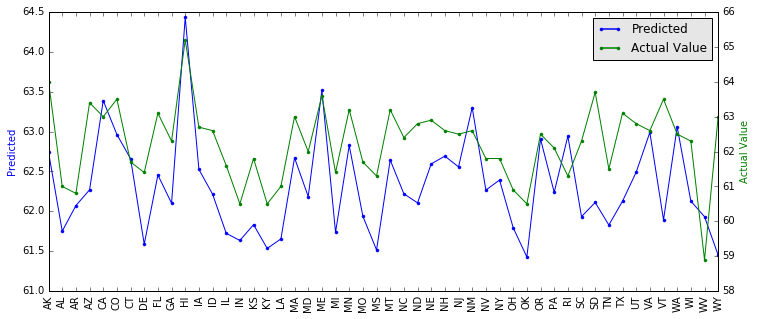

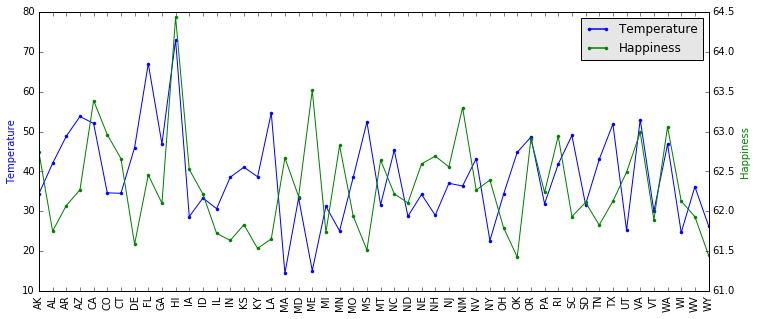

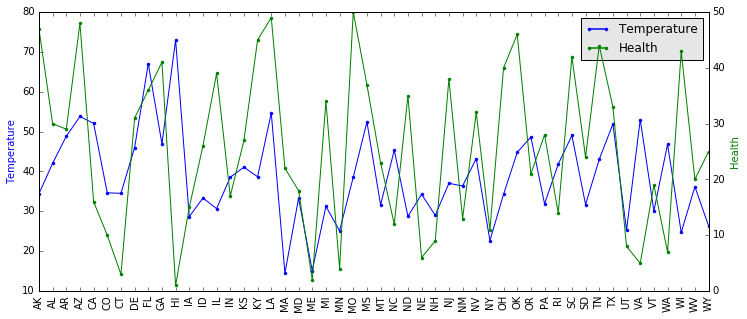

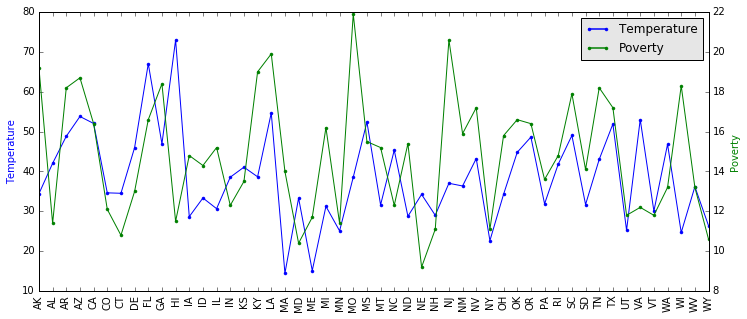

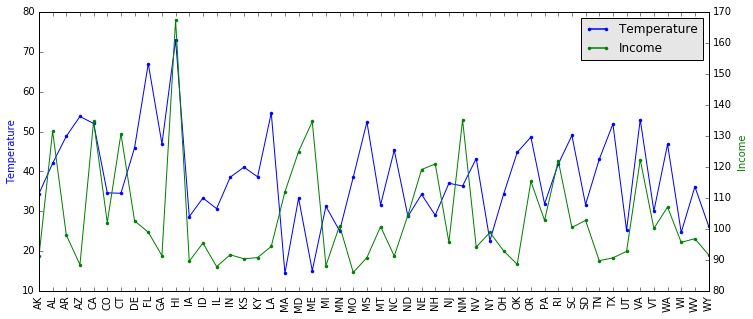

Accuracy: -0.097526
Error: 1.204564


In [72]:
clf=predict_x(tfidf_matrix, y_wellbeing, 'well_being')

In [ ]:
plot_trends(sorted(location_dict), tfidx_matrix[:, 10934], y, 'Predicted', 'Actual Value')

**Public health trend analysis using twitter**

**Finished reading the Truth Labels for 9 ailments**

**Reading tweets**

1551 no. of tweets in state: AK
700 no. of tweets in state: AL
497 no. of tweets in state: AR
1175 no. of tweets in state: AZ
2222 no. of tweets in state: CA
1765 no. of tweets in state: CO
956 no. of tweets in state: CT
464 no. of tweets in state: DE
1540 no. of tweets in state: FL
1262 no. of tweets in state: GA
2045 no. of tweets in state: HI
734 no. of tweets in state: IA
711 no. of tweets in state: ID
1497 no. of tweets in state: IL
847 no. of tweets in state: IN
981 no. of tweets in state: KS
678 no. of tweets in state: KY
1410 no. of tweets in state: LA
910 no. of tweets in state: MA
679 no. of tweets in state: MD
1135 no. of tweets in state: ME
644 no. of tweets in state: MI
861 no. of tweets in state: MN
669 no. of tweets in state: MO
561 no. of tweets in state: MS
794 no. of tweets in state: MT
757 no. of tweets in state: NC
350 no. of tweets in state: ND
788 no. of tweets in state: NE
749 no. of tweets in state: NH
811 no. of tweets in state: NJ
289 no. of tweets in state: N

**Creating the feature matrix**

matrix represents 50 documents with 10933 features


**Result of prediction without removing errorenous terms**

**Result of prediction for obesity**

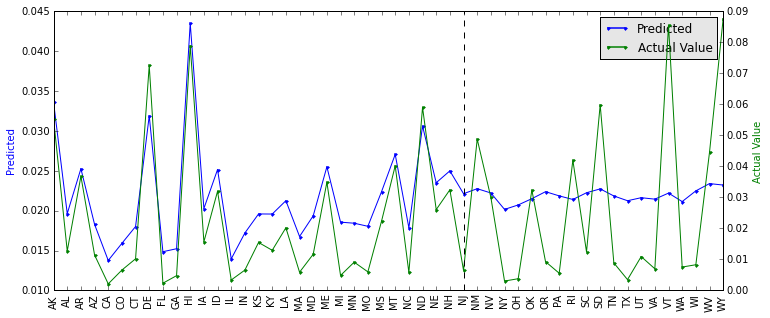

Accuracy: 0.973704
Error: 0.000691
relevant terms for state AK : lazy ,painful ,pack ,language ,push ,planet ,phil ,sides ,tourney ,plot
relevant terms for state AL : lazy ,pretend ,pet ,hurts ,bar ,outta ,stand ,awake ,ship ,loud
relevant terms for state AR : pack ,push ,plot ,smell ,parties ,outta ,root ,freshman ,forward ,loud
relevant terms for state AZ : lazy ,pack ,planet ,smell ,hurts ,points ,realized ,lame ,simply ,homies
relevant terms for state CA : pretend ,pet ,hurts ,bar ,snow ,realized ,eventually ,homies ,fat ,husband
relevant terms for state CO : pack ,language ,push ,gust ,snow ,realized ,outta ,simply ,cream ,fat
relevant terms for state CT : planet ,adventure ,pretend ,pet ,points ,realized ,outta ,simply ,listens ,explain
relevant terms for state DE : lazy ,painful ,pack ,language ,push ,halfway ,planet ,sides ,tourney ,focused
relevant terms for state FL : pack ,push ,focused ,adventure ,bar ,explain ,epic ,stand ,awake ,stays
relevant terms for state GA : smell ,

**The above output consists of many irrelevant terms which needs to be removed in order to get terms that make more intuitive sense.**

**We have thus identified the top weighted irrevelant terms and filtered them off**

**Removing errorenous terms from the feature matrix. (This may take a while..)**

matrix represents 50 documents with 10933 features


**Result of prediction after removing errorenous terms**

**Result of prediction for obesity**

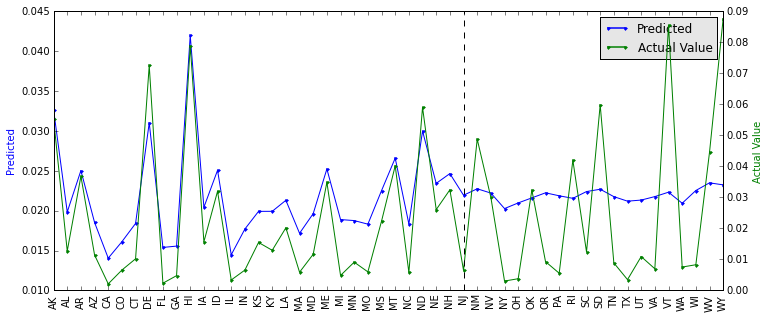

Accuracy: 0.973728
Error: 0.000690
relevant terms for state AK : lazy ,painful ,pack ,language ,push ,planet ,sides ,tourney ,plot ,adventure
relevant terms for state AL : lazy ,pretend ,pet ,hurts ,bar ,outta ,stand ,awake ,ship ,loud
relevant terms for state AR : pack ,push ,plot ,smell ,parties ,outta ,root ,freshman ,loud ,perfection
relevant terms for state AZ : lazy ,pack ,planet ,smell ,hurts ,realized ,lame ,simply ,homies ,explain
relevant terms for state CA : pretend ,pet ,hurts ,bar ,realized ,eventually ,homies ,fat ,bag ,husband
relevant terms for state CO : pack ,language ,push ,gust ,realized ,outta ,simply ,cream ,fat ,epic
relevant terms for state CT : planet ,adventure ,pretend ,pet ,realized ,outta ,simply ,listens ,explain ,personal
relevant terms for state DE : lazy ,painful ,pack ,language ,push ,planet ,sides ,tourney ,focused ,pretend
relevant terms for state FL : pack ,push ,adventure ,focused ,bar ,explain ,epic ,stand ,awake ,stays
relevant terms for state GA

**Result of prediction for STD**

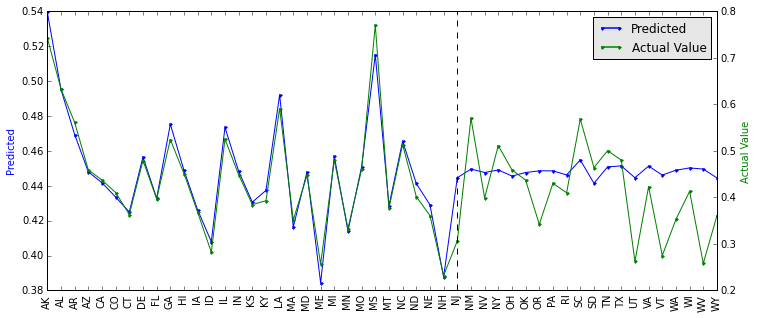

Accuracy: 0.903187
Error: 0.009373
relevant terms for state AK : folks ,songs ,type ,quit ,gon ,bag ,date ,mention ,bones ,semester
relevant terms for state AL : folks ,songs ,type ,gon ,date ,mention ,ion ,semester ,angel ,certain
relevant terms for state AR : songs ,type ,quit ,date ,ion ,bones ,semester ,anyways ,worried ,cuddles
relevant terms for state AZ : songs ,date ,mention ,angel ,certain ,worried ,bitches ,john ,niggas ,salty
relevant terms for state CA : songs ,type ,gon ,bag ,date ,semester ,angel ,anyways ,worried ,bitches
relevant terms for state CO : folks ,quit ,gon ,date ,semester ,bitches ,john ,niggas ,graduate ,dear
relevant terms for state CT : gon ,date ,angel ,certain ,worried ,niggas ,dear ,hearing ,truth ,waking
relevant terms for state DE : gon ,bag ,mention ,angel ,niggas ,feelings ,pirates ,nose ,asf ,saturday
relevant terms for state FL : folks ,songs ,gon ,date ,ion ,certain ,worried ,john ,niggas ,hearing
relevant terms for state GA : folks ,songs ,type 

**Result of prediction for Mammography**

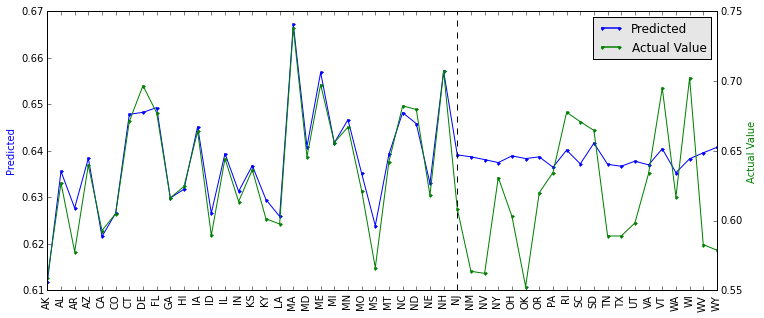

Accuracy: 0.952565
Error: 0.002250
relevant terms for state AK : bring ,accurate ,took ,per ,feet ,cousin ,low ,tree ,losing ,course
relevant terms for state AL : celebrate ,feast ,field ,accurate ,took ,package ,vacation ,cousin ,dialysis ,bless
relevant terms for state AR : sir ,accurate ,nothin ,deserves ,dry ,course ,store ,blessings ,cvs ,easy
relevant terms for state AZ : rip ,beer ,ideas ,bring ,beauty ,field ,schedule ,wide ,east ,streets
relevant terms for state CA : rip ,cosmetics ,beer ,bring ,beauty ,field ,enjoyed ,schedule ,sir ,fantasy
relevant terms for state CO : beer ,bring ,field ,sir ,advisor ,accurate ,pop ,took ,relatives ,clinical
relevant terms for state CT : rip ,cosmetics ,hilarious ,celebrate ,ideas ,offensive ,sox ,bring ,beauty ,leaves
relevant terms for state DE : rip ,snaps ,beer ,ideas ,grandmother ,bring ,argue ,beauty ,field ,schedule
relevant terms for state FL : rip ,cosmetics ,hilarious ,beer ,ideas ,offensive ,bring ,cards ,argue ,beauty
relevant t

**Result of prediction for HIV**

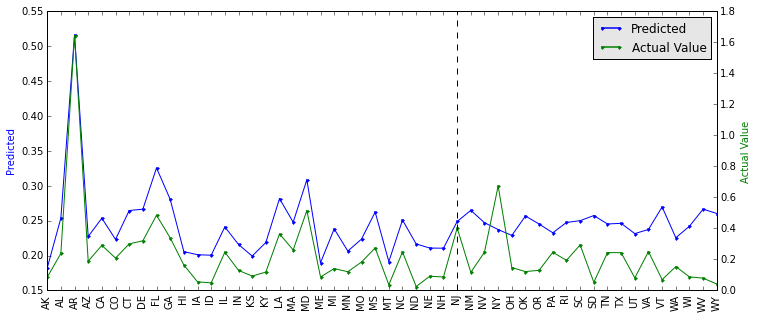

Accuracy: 0.842559
Error: 0.024788
relevant terms for state AK : animal ,currently ,hearing ,beyond ,deals ,none ,freaking ,date ,silly ,anatomy
relevant terms for state AL : fell ,waking ,featured ,tripping ,tough ,ill ,nose ,messing ,ion ,daughter
relevant terms for state AR : shall ,fell ,waking ,animal ,romantic ,wolf ,chain ,nyc ,messed ,muy
relevant terms for state AZ : fell ,waking ,stfu ,rich ,release ,advantage ,ill ,deserves ,nose ,flying
relevant terms for state CA : shall ,fell ,waking ,animal ,wolf ,messed ,muy ,shine ,currently ,relaxing
relevant terms for state CO : shall ,animal ,wolf ,currently ,guide ,finalist ,drivers ,beyond ,rich ,advantage
relevant terms for state CT : shall ,fell ,waking ,animal ,nyc ,criminal ,jammin ,sweetie ,relaxing ,stfu
relevant terms for state DE : chain ,mtvstars ,april ,advantage ,tough ,dry ,nose ,shambles ,freaking ,son
relevant terms for state FL : fell ,waking ,animal ,romantic ,nyc ,messed ,muy ,criminal ,jammin ,shine
relevant term

**Result of prediction for Flu**

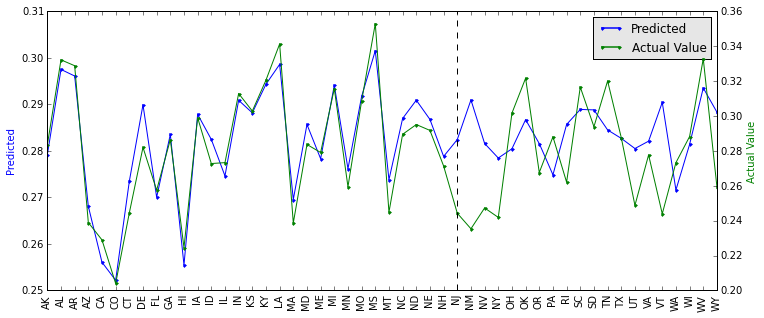

Accuracy: 0.970527
Error: 0.000869
relevant terms for state AK : songs ,folks ,study ,league ,regardless ,department ,crooked ,followed ,semester ,focus
relevant terms for state AL : sonic ,sec ,ion ,songs ,folks ,bestfriend ,study ,league ,childish ,system
relevant terms for state AR : sonic ,sec ,ion ,songs ,study ,department ,carhop ,tripping ,admit ,semester
relevant terms for state AZ : sonic ,songs ,department ,giving ,worried ,loves ,fav ,shots ,skating ,helped
relevant terms for state CA : sec ,songs ,league ,carolina ,childish ,system ,semester ,giving ,worried ,anxiety
relevant terms for state CO : folks ,league ,semester ,bottom ,quit ,dropped ,graduate ,fav ,turned ,wild
relevant terms for state CT : sonic ,nails ,bestfriend ,study ,tripping ,giving ,hire ,worried ,goals ,swear
relevant terms for state DE : bestfriend ,band ,learn ,swear ,conversations ,fav ,somebody ,blues ,due ,men
relevant terms for state FL : sonic ,ion ,songs ,folks ,department ,followed ,tripping ,vib

**Result of prediction for Excessive Drinking**

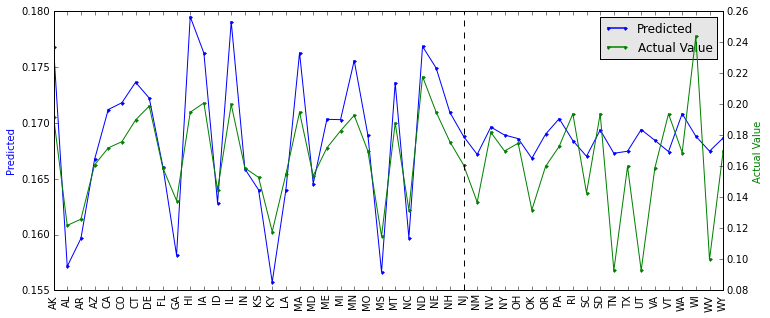

Accuracy: 0.963444
Error: 0.001336
relevant terms for state AK : company ,bring ,taken ,kick ,simply ,kidding ,realized ,cold ,throwback ,tour
relevant terms for state AL : plan ,drink ,meet ,caught ,both ,joke ,hurts ,photos ,praying ,losing
relevant terms for state AR : push ,tells ,course ,winter ,inside ,nurse ,makeup ,thx ,players ,add
relevant terms for state AZ : company ,bring ,kick ,ruin ,beauty ,simply ,realized ,cold ,tour ,cheese
relevant terms for state CA : company ,bring ,taken ,kick ,ruin ,beauty ,kidding ,realized ,cold ,throwback
relevant terms for state CO : company ,bring ,kick ,ruin ,simply ,kidding ,realized ,cold ,tour ,cheese
relevant terms for state CT : bring ,kick ,beauty ,simply ,realized ,cold ,throwback ,fuckin ,texts ,ridiculous
relevant terms for state DE : company ,bring ,snaps ,beauty ,simply ,realized ,cold ,cheese ,fuckin ,push
relevant terms for state FL : bring ,taken ,kick ,cards ,storm ,beauty ,cold ,tour ,cheese ,fuckin
relevant terms for state 

**Result of prediction for Diabetes**

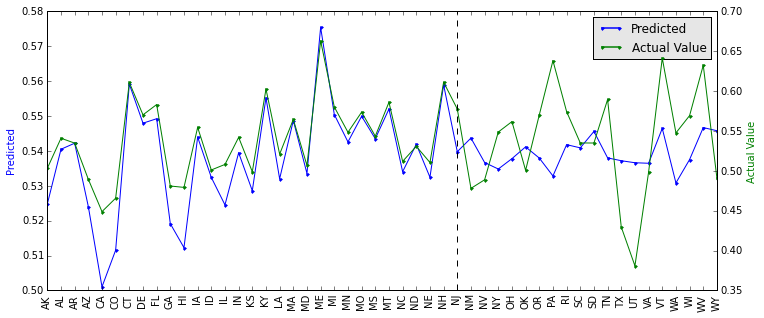

Accuracy: 0.935011
Error: 0.004224
relevant terms for state AK : instagram ,pizza ,rides ,teachers ,emotional ,adventure ,eye ,rude ,holding ,ben
relevant terms for state AL : chat ,pizza ,families ,mistakes ,field ,feast ,ring ,shame ,ben ,charlie
relevant terms for state AR : pizza ,families ,conditions ,wont ,endless ,pie ,attend ,dry ,mercy ,accurate
relevant terms for state AZ : ideas ,instagram ,pizza ,families ,field ,sos ,eye ,holding ,pie ,wide
relevant terms for state CA : chat ,pizza ,families ,field ,sauce ,eye ,shame ,rude ,fantasy ,number
relevant terms for state CO : letter ,field ,wont ,holding ,pie ,hyped ,contract ,aww ,crush ,mercy
relevant terms for state CT : aide ,chat ,ideas ,letter ,sox ,instagram ,hilarious ,balls ,jeff ,pizza
relevant terms for state DE : argue ,ideas ,spongebob ,pizza ,field ,eye ,pie ,wide ,number ,umm
relevant terms for state FL : chat ,argue ,ideas ,instagram ,hilarious ,balls ,glasses ,jeff ,pizza ,rides
relevant terms for state GA : jeff

**Result of prediction for Cancer**

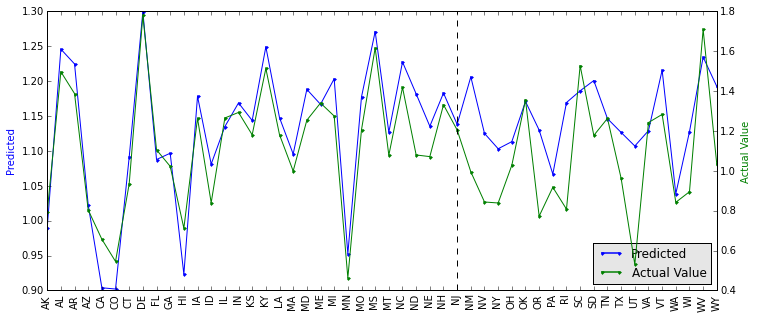

Accuracy: 0.738199
Error: 0.068540
relevant terms for state AK : number ,few ,emotional ,anymore ,personality ,swear ,killing ,woah ,picture ,pirates
relevant terms for state AL : bestfriend ,letting ,grinch ,ion ,few ,anymore ,learn ,swear ,woah ,band
relevant terms for state AR : ion ,few ,anymore ,learn ,chain ,swear ,carhop ,killing ,derek ,sonic
relevant terms for state AZ : few ,sonic ,sleeping ,fav ,straight ,threw ,changed ,ideas ,niggas ,pay
relevant terms for state CA : number ,letting ,few ,twice ,anymore ,learn ,swear ,killing ,picture ,attention
relevant terms for state CO : few ,anymore ,killing ,float ,fav ,temp ,men ,straight ,lose ,threw
relevant terms for state CT : bestfriend ,number ,emotional ,anymore ,swear ,common ,float ,sonic ,sleeping ,hilarious
relevant terms for state DE : bestfriend ,number ,letting ,hat ,grinch ,few ,twice ,depot ,anymore ,personality
relevant terms for state FL : number ,ion ,few ,emotional ,depot ,anymore ,learn ,killing ,woah ,common
re

**Result of prediction for Adult Smoking**

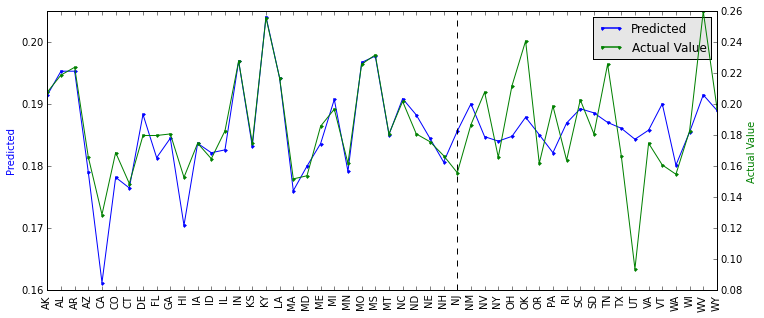

Accuracy: 0.965849
Error: 0.001166
relevant terms for state AK : followed ,personality ,emotional ,folks ,worried ,dropped ,affairs ,quit ,league ,department
relevant terms for state AL : sonic ,followed ,folks ,worried ,dropped ,affairs ,league ,vibes ,semester ,bout
relevant terms for state AR : sonic ,carhop ,worried ,dropped ,admit ,affairs ,quit ,department ,skating ,semester
relevant terms for state AZ : sonic ,worried ,affairs ,parttime ,department ,skating ,laughed ,lab ,bout ,meal
relevant terms for state CA : worried ,league ,semester ,carolina ,finish ,learn ,graduate ,letting ,barometer ,songs
relevant terms for state CO : folks ,dropped ,quit ,league ,swag ,lab ,semester ,bout ,meal ,server
relevant terms for state CT : sonic ,emotional ,worried ,bout ,finish ,lord ,words ,treated ,ate ,takes
relevant terms for state DE : personality ,bout ,learn ,letting ,men ,unless ,few ,strength ,fav ,bestfriend
relevant terms for state FL : sonic ,followed ,emotional ,folks ,worried ,

**End of Public Health trend analysis**

In [1]:
import sys
import ConfigParser
import io
import ast
import json
from sklearn.cross_validation import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifierCV
from scipy.stats.stats import pearsonr
import re
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(12.0,5.0)
from IPython.display import Markdown, display
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.metrics import mean_squared_error
import math

def printmd(string):
    display(Markdown(string))

def location_storage(filename):
    tweets = [];
    location_file="data_run" + os.sep+filename;
    #location_file=filename;
    location_dict={};
    location_full_form={};
    with open(location_file) as f:
        for line in f:
            line=line.strip();
            line=line.replace(' ', '');
            location_list=[line.split(':')]
            location_dict[location_list[0][0]]=location_list[0][1];
            location_full_form[location_list[0][0]]=location_list[0][2];
    return location_dict,location_full_form ;

def y_matrix(filename):
    y_file=filename;
    y_dict={};
    y_list=[]
    with open(y_file) as f:
        for line in f:
            line=line.strip();
            line=line.replace(' ', '');
            y_list=[line.split(':')]
            y_dict[y_list[0][0]]=y_list[0][1];
    return y_dict ;

def get_tweets_dict(location_dict):
    tweets_text=[]
    tweets_place = {};
    tweet_text_list=[];
    tweet_text_string=''
    y_obesity=[]
    y_std=[]
    y_mammography=[]
    y_hiv=[]
    y_flu=[]
    y_excessive_drinking=[]
    y_diabetes=[]
    y_cancer=[]
    y_adultsmoking=[]
    count_state_tweets=0;
    
    for i in sorted(location_dict):
        fname="data_run" + os.sep+"tweet_state_data_"+i+".json"
        files =  open(fname);
        lists=[x.strip() for x in files.readlines()]
        string_file=str(lists)
        tweet_data=string_file.split("||;");
        tweet_data=tweet_data[0:len(tweet_data)-1]
        for td in tweet_data:
            #tweet_text_list.append(td.split("||~")[0]);
            tweet_place_string=td.split("||~")[1];
            tweet_place_str=tweet_place_string.split("==>")[1]
            if re.findall(i, tweet_place_str) or re.findall(location_full_form[i],tweet_place_str , re.I):
                tweet_text_str=td.split("||~")[0];
                tweet_text_list.append(tweet_text_str.split("==>")[1])
        #for listlen in range(len(tweet_text_list)):
        for listlen in set(tweet_text_list):
            tweet_text_string=listlen+" "+tweet_text_string
        count_state_tweets=len(set(tweet_text_list));
        print "%d no. of tweets in state: %s" % (count_state_tweets, i);
        tweets_text.append(tweet_text_string);
        y_obesity.append(1. * float(y_dict_obesity[i]))
        y_std.append(1. * float(y_dict_std[i]))
        y_mammography.append(1. * float(y_dict_mammography[i]))
        y_hiv.append(1. * float(y_dict_hiv[i]))
        y_flu.append(1. * float(y_dict_flu[i]))
        y_excessive_drinking.append(1. * float(y_dict_excessive_drinking[i]))
        y_diabetes.append(1. * float(y_dict_diabetes[i]))
        y_cancer.append(1. * float(y_dict_cancer[i]))
        y_adultsmoking.append(1. * float(y_dict_adultsmoking[i]))
        count_state_tweets=0;
        tweet_text_list=[]
        tweet_text_string='';
    return tweets_text,np.array(y_obesity, dtype=float),np.array(y_std, dtype=float),np.array(y_mammography, dtype=float),np.array(y_hiv, dtype=float),np.array(y_flu, dtype=float),np.array(y_excessive_drinking, dtype=float),   np.array(y_diabetes, dtype=float),np.array(y_cancer, dtype=float),np.array(y_adultsmoking, dtype=float)
        
def tokenize(string, lowercase=True, keep_punctuation=False,
             collapse_urls=True, collapse_mentions=True, collapse_emoji=True):
    """ Split a tweet into tokens."""
    if not string:
        return []
    string = re.sub(r'\W*\b\w{1,2}\b', '', string)
    string = re.sub('lmao\S+', '', string)
    string = re.sub('yess\S+', '', string)
    string = re.sub(r'\w*\d\w*', '', string)
    string = re.sub(r'\w*thanksgiving\w*', '', string)
    string = re.sub('ahh\S+', '', string)
    string = re.sub(r'yooo\S+', '', string)
    string = re.sub(r'sooo\S+', '', string)
    string = re.sub(r'buttt\S+', '', string)
    string = re.sub(r'ohhhh\S+', '', string)
    string = re.sub(r'goooo\S+', '', string)
    string = re.sub(r'bihhh\S+', '', string)
    
    string = re.sub(r'lmfao\S+', '', string)
    
    if lowercase:
        string = string.lower()
    tokens = []
    if collapse_urls:
        string = re.sub('http\S+', 'THIS_IS_A_URL', string)
    if collapse_mentions:
        string = re.sub('@\S+', 'THIS_IS_A_MENTION', string)
    if collapse_emoji:
        string = re.sub(r'\\x[0123456789abcdef]+', '', string)
    if keep_punctuation:
        tokens = string.split()
    else:
        tokens = re.sub('\W+', ' ', string).split()
    return tokens

def plot_trends(x, y1, y2, label1, label2):
    # Plot two trends with different y-scales
    fig, ax1 = plt.subplots()
    l1=ax1.plot(y1, 'b.-', label=label1)
    ax1.set_ylabel(label1, color='b')
    plt.xticks(range(len(x))[::1], x[::1], rotation='90')
    ax2 = ax1.twinx()
    l2=ax2.plot(y2, 'g.-', label=label2)
    ax2.set_ylabel(label2, color='g')
    lgs=l1+l2;
    lg = [l.get_label() for l in lgs]
    legend= ax1.legend(lgs, lg, loc=0)
    # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
    frame = legend.get_frame()
    frame.set_facecolor('0.90')

# Set the fontsize
    for label in legend.get_texts():
        label.set_fontsize('large')

    for label in legend.get_lines():
        label.set_linewidth(1.5)  # the legend line width
    plt.axvline(30,color='k', linestyle='--')
    plt.show()
        
def vector(tokenizer, min_df, max_df, binary, stop_words,ngram_range):
    vec = CountVectorizer(tokenizer=tokenizer, min_df=min_df,max_df=max_df,binary=binary, stop_words=stop_words, 
                          ngram_range=ngram_range, dtype=np.float);
    
    vect=vec.fit_transform(tweets_text);
    return (vect, vec)

def create_x(matrix):
    tfidf_matrix=lil_matrix(matrix.copy())
    for i in range(0, tfidf_matrix.shape[0]):
        for j in range(0, tfidf_matrix.shape[1]):
            tfidf_matrix[i,j]=tfidf_matrix[i,j]/50;
    tfidf_matrix=tfidf_matrix.tocsr()
    return tfidf_matrix;

        
def predict_x(x, y, trend):
    if(trend=='obesity'):
        y=y_obesity;
    elif(trend=='std'):
        y=y_std;
    elif(trend=='diabetes'):
        y=y_diabetes;
    elif(trend=='hiv'):
        y=y_hiv;
    elif(trend=='mammography'):
        y=y_mammography;
    elif(trend=='cancer'):
        y=y_cancer;
    elif(trend=='adultsmoking'):
        y=y_adultsmoking;
    elif(trend=='excessive_drinking'):
        y=y_excessive_drinking;
    elif(trend=='flu'):
        y=y_flu;
        
    train_idx=range(0,30)
    test_idx=range(30,50)
    clf = RidgeCV(alphas=[1,1, 1, 1], cv=10)
    clf.fit(x[train_idx], y[train_idx])
    #print clf.score(tfidf_matrix[test_idx], y_obesity[test_idx])
    train_pred= clf.predict(x[train_idx])
    test_pred = clf.predict(x[test_idx])
    all_preds = np.concatenate((train_pred, test_pred))
    plot_trends(sorted(location_dict), all_preds, y, 'Predicted', 'Actual Value')
    print "Accuracy: %0.6f" % (1-math.sqrt(mean_squared_error(y[test_idx], test_pred)))
    print "Error: %0.6f" % (mean_squared_error(y[test_idx], test_pred))
    return clf;
        
def get_relevant_terms(clf):
    state_wise_relevant_terms=[]
    for state in range(0,50):
        indices = sorted(tfidf_matrix[state].indices, key=lambda x: clf.coef_[x], reverse=True)[:10]
        for ind in indices:
            state_wise_relevant_terms.append(vec.get_feature_names()[ind])
        print "relevant terms for state %s : %s" %(sorted(location_dict.keys())[state],' ,'.join(state_wise_relevant_terms))
        state_wise_relevant_terms=[]
        
def train_after_removing_features(X, vec, features_to_remove):
    for termy in features_to_remove:
        if(termy in vec.get_feature_names()):
            index_term=vec.get_feature_names().index(termy);
            for termx in range(0, X.shape[0]):
                if(X[termx, index_term] == 1):
                    X[termx, index_term] =0;
    return X;

printmd('**Public health trend analysis using twitter**')
location_dict, location_full_form = location_storage('bounding_box_locations.txt')
y_dict_obesity = y_matrix('y_obesity.txt')
y_dict_std = y_matrix('y_std.txt')
y_dict_flu = y_matrix('y_flu.txt')
y_dict_hiv = y_matrix('y_hiv.txt')
y_dict_mammography = y_matrix('y_mammography.txt')
y_dict_excessive_drinking = y_matrix('y_excessive_drinking.txt')
y_dict_cancer = y_matrix('y_cancer.txt')
y_dict_adultsmoking = y_matrix('y_adultsmoking.txt')
y_dict_diabetes = y_matrix('y_diabetes.txt')
printmd('**Finished reading the Truth Labels for 9 ailments**')
printmd('**Reading tweets**')
tweets_text,y_obesity,y_std,y_mammography,y_hiv,y_flu,y_excessive_drinking,y_diabetes,y_cancer,y_adultsmoking=get_tweets_dict(location_dict)  
printmd('**Creating the feature matrix**')
matrix, vec = vector(tokenize,2,49,True, ['happy', 'thanksgiving'], (1,1))
print ('matrix represents %d documents with %d features' % (matrix.shape[0], matrix.shape[1]))
tfidf_matrix=create_x(matrix)
printmd('**Result of prediction without removing errorenous terms**')
printmd('**Result of prediction for obesity**')
clf=predict_x(tfidf_matrix, y_obesity, 'obesity')
get_relevant_terms(clf);
printmd('**The above output consists of many irrelevant terms which needs to be removed in order to get terms that make more intuitive sense.**')
printmd('**We have thus identified the top weighted irrevelant terms and filtered them off**')
printmd('**Removing errorenous terms from the feature matrix. (This may take a while..)**')
new_matrix = train_after_removing_features(matrix.copy(), vec, [x.split(',') for x in open('remove_terms.txt').readlines()][0])
new_matrix = train_after_removing_features(new_matrix.copy(), vec, [x.lower().split(',') for x in open('cities.txt').readlines()][0])
print ('matrix represents %d documents with %d features' % (new_matrix.shape[0], new_matrix.shape[1]))
tfidf_matrix=create_x(new_matrix)
printmd('**Result of prediction after removing errorenous terms**')
printmd('**Result of prediction for obesity**')
clf=predict_x(tfidf_matrix, y_obesity, 'obesity')
get_relevant_terms(clf);
printmd('**Result of prediction for STD**')
clf=predict_x(tfidf_matrix,y_std,'std')
get_relevant_terms(clf);
printmd('**Result of prediction for Mammography**')
clf=predict_x(tfidf_matrix,y_mammography, 'mammography')
get_relevant_terms(clf);
printmd('**Result of prediction for HIV**')
clf=predict_x(tfidf_matrix,y_hiv,'hiv')
get_relevant_terms(clf);
printmd('**Result of prediction for Flu**')
clf=predict_x(tfidf_matrix,y_flu,'flu')
get_relevant_terms(clf);
printmd('**Result of prediction for Excessive Drinking**')
clf=predict_x(tfidf_matrix,y_excessive_drinking,'excessive_drinking')
get_relevant_terms(clf);
printmd('**Result of prediction for Diabetes**')
clf=predict_x(tfidf_matrix,y_diabetes,'diabetes')
get_relevant_terms(clf);
printmd('**Result of prediction for Cancer**')
clf=predict_x(tfidf_matrix,y_cancer,'cancer')
get_relevant_terms(clf);
printmd('**Result of prediction for Adult Smoking**')
clf=predict_x(tfidf_matrix,y_adultsmoking,'adultsmoking')
get_relevant_terms(clf);
printmd('**End of Public Health trend analysis**')



In [89]:
import sys
import json
from pprint import pprint

def hw():
    print 'Hello, world!'

def lines(fp):
    print str(len(fp.readlines()))

def pri(y):
    print y

    
    
afinnfile = open('AFINN-111.txt')
scores = {} # initialize an empty dictionary
for line in afinnfile:
    term, score  = line.split("\t")  
    scores[term] = int(score)  

#print scores.items() 

new=open('FL_tweet.txt')
for line in new:
#    data=json.loads(line)
#pri(data)
    sum=0
#    if "text" in data:
    l=line.decode('utf-8')
    l2=l.encode('ascii','ignore')
        #l3="hi i am ujjwal"
    #pri(l2)
        #for word in l3:
    #print(word)
    ter=l2.split(" ")
        #print(ter)
    for a in ter:
            #print a
        if a in scores:
            sum=sum+scores.get(a)
    if(sum!=0):
        print sum          


3
2
12
-2
6
2
-3
-4
-5
-4
-4
-2
-1
3
-1
4
3
2
-10
8
3
-1
2
3
1
1
2
-2
3
5
-2
1
-2
-3
-2
-5
2
3
-4
-1
3
1
2
4
-8
3
3
-5
1
4
3
-3
2
2
2
-1
3
-2
-1
1
1
1
-3
-2
10
3
2
3
-2
4
-1
-7
1
-2
3
1
3
-1
-5
3
-1
-1
5
-4
-3
-4
-1
-3
6
3
2
-1
2
1
3
3
3
-3
-2
5
4
-4
-6
-2
4
-3
5
-1
4
1
2
3
3
-1
2
3
3
2
-6
8
3
3
3
-6
-3
3
-3
4
-3
2
1
-4
3
3
-1
-1
1
-4
1
1
2
3
6
3
4
-5
2
3
3
1
2
1
-1
3
6
2
1
-3
3
3
3
-4
5
5
-1
-4
-1
-1
3
2
-11
-2
1
2
-3
1
1
-4
6
1
5
6
3
2
3
-2
-1
-1
3
3
2
3
-2
6
2
-2
1
3
-1
5
-1
1
1
2
8
2
2
1
4
7
-1
-1
-2
-1
2
2
3
2
2
-3
2
2
1
3
5
1
3
3
3
2
1
-5
3
-2
-2
-4
2
4
-1
2
-5
1
3
-1
-4
3
3
-1
4
4
-1
-3
-1
-3
-1
6
-3
-1
2
-4
3
-1
3
3
3
-2
2
1
3
2
-4
-2
2
2
1
3
2
-1
-7
2
-4
3
3
-2
-2
3
-3
-1
2
-2
-2
-3
-2
-6
1
-3
-2
2
-2
3
2
2
-1
3
2
4
-4
2
1
-2
-5
-2
4
-2
3
-1
2
3
-1
-3
6
1
4
3
-1
3
-3
2
4
-3
2
-1
-3
2
-2
2
3
1
-4
-1
-3
-2
-1
3
-6
1
2
1
-3
-1
-1
2
2
1
-6
2
1
3
-2
-2
2
-3
2
2
-8
4
-2
1
-2
2
3
-3
-3
4
3
3
2
1
-2
2
1
-2
4
3
4
4
3
1
3
5
-1
-4
1
-3
4
-5
4
-2
3
3
1
3
2
2
-2
2
10
3
-4
-4
3
-2
3
1
3
2
3